In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
parking= pd.read_csv(r"C:\Users\User\Desktop\EASILITECH\Data_Sets\parking_Dataset.csv")

In [6]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [7]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [8]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [9]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [10]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

In [11]:
parking.shape

(9060, 6)

# 1. What is the distribution or values for owned/leased

<BarContainer object of 9060 artists>

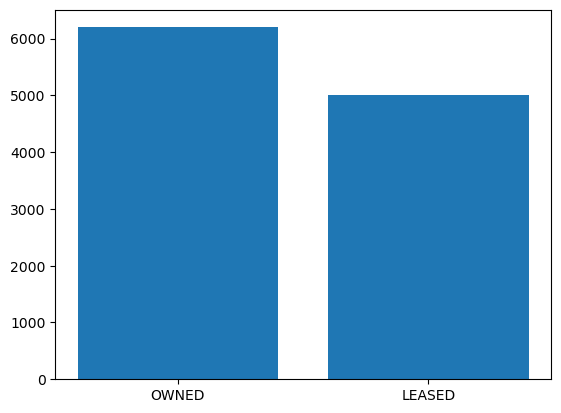

In [14]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [15]:
owned_leased=pd.pivot_table(parking,index='Owned/Leased',values='Total Parking Spaces',aggfunc='count')

In [16]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<Axes: xlabel='Owned/Leased'>

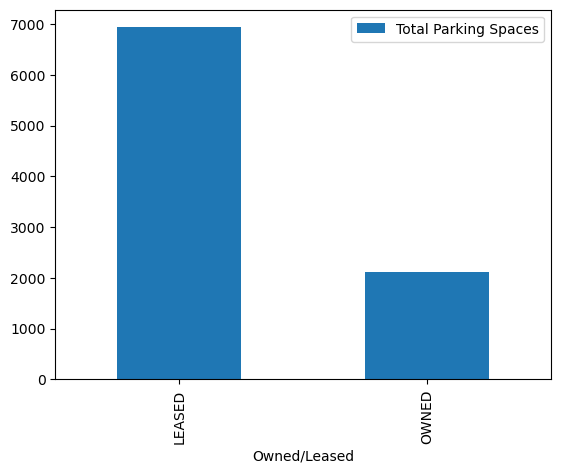

In [17]:
owned_leased.plot(kind='bar')

# 2. In which building state parking situation is in excess - Put it in a order

In [18]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [19]:
excess_parking= pd.pivot_table(parking,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')

In [20]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [21]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [22]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<Axes: xlabel='Bldg State'>

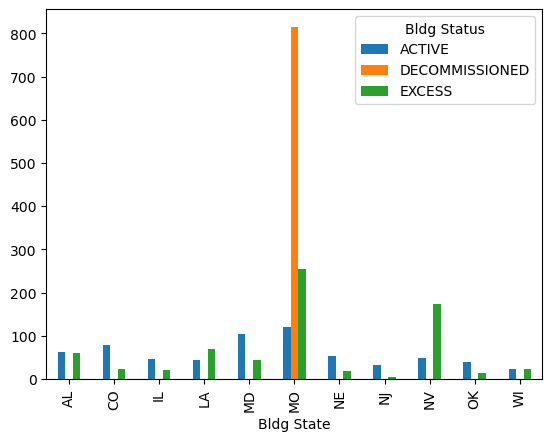

In [23]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

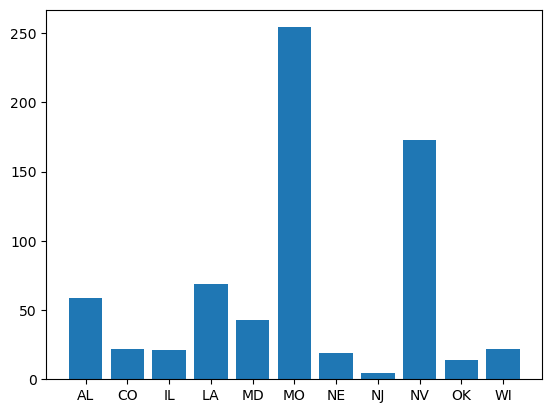

In [24]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [25]:
excess_parking_sorted=excess_parking.EXCESS.sort_values(ascending = True)

In [26]:
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

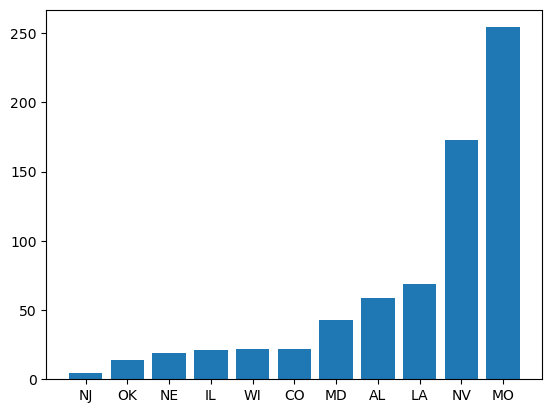

In [27]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

# 3. Bldg cities that have been decommisioned along with total parking

In [28]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [29]:
decomm_parking_city= parking[parking['Bldg Status'] == 'DECOMMISSIONED']

In [30]:
decomm_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [31]:
decomm_parking_city1= pd.pivot_table(parking,index='Bldg City',columns='Bldg Status',values='Total Parking Spaces')

In [32]:
decomm_parking_city1

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


In [33]:
decomm_parking_city1 = decomm_parking_city1[decomm_parking_city1.DECOMMISSIONED > 0]

In [35]:
decomm_parking_city[decomm_parking_city['Total Parking Spaces'] > 0]

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


# 4. In which type of property parking space is in excess

In [36]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [37]:
excess_parking_property = pd.pivot_table(parking[parking['Bldg Status']== 'EXCESS'],index='Property Type', values='Total Parking Spaces')

In [38]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5. Where is more active parking - Owned/Leased

In [39]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [40]:
active_parking= pd.pivot_table(parking[parking['Bldg Status']== 'ACTIVE'],index='Owned/Leased', values='Total Parking Spaces')

In [41]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [42]:
active_parking['%Contri'] = active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

In [43]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6. State with more leased parking

In [44]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [45]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'],index='Bldg State',values='Total Parking Spaces')

In [46]:
state_leased_parking 

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828


In [47]:
state_leased_parking1 =state_leased_parking.sort_values('Total Parking Spaces',ascending=False)

In [48]:
state_leased_parking1

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [49]:
state_leased_parking1.head()

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882


# 7. which property type has more active parking

In [50]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [51]:
max_active_parking = pd.pivot_table(parking[parking['Bldg Status']== 'ACTIVE'],index='Property Type',values='Total Parking Spaces')

In [52]:
max_active_parking

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


In [53]:
max_active_parking.sort_values('Total Parking Spaces',ascending = False).head(1)

,Total Parking Spaces
Property Type,
STRUCTURE,70.779762


# 8. How's the distribution of parking in city by property type

In [54]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [55]:
property_parking= pd.pivot_table(parking,index='Bldg State',columns='Property Type',values='Total Parking Spaces')

In [56]:
property_parking

Property Type,BUILDING,LAND,STRUCTURE
Bldg State,,,
AL,61.344262,0.000000,245.000000
AR,33.160494,NaN,192.500000
AZ,33.807692,0.000000,10.750000
CA,59.512363,0.000000,120.200000
CO,81.214912,13.777778,35.600000
CT,29.327586,NaN,NaN
DC,39.304444,109.400000,48.807692
DE,15.750000,NaN,NaN
FL,52.354680,0.000000,36.200000


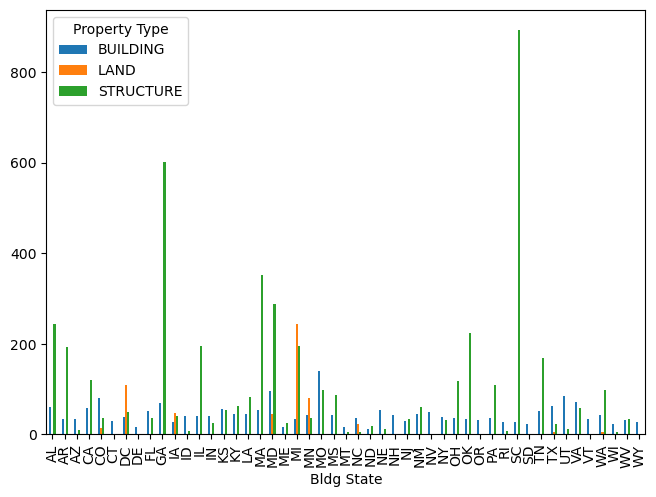

In [57]:
property_parking.plot(kind='bar')


plt.tight_layout(pad=0.1,w_pad=10,h_pad=5)

# 9. Building State which has 0 parking space

In [58]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [59]:
parking_space = parking[parking['Total Parking Spaces']== 0]

In [60]:
parking_space.groupby('Bldg State')['Total Parking Spaces'].value_counts()

Bldg State  Total Parking Spaces
AL          0                        32
AR          0                         5
AZ          0                        68
CA          0                       121
CO          0                        57
CT          0                         7
DC          0                       349
DE          0                        14
FL          0                        68
GA          0                        42
IA          0                         9
ID          0                        22
IL          0                        48
IN          0                        52
KS          0                        15
KY          0                        34
LA          0                        21
MA          0                        25
MD          0                       222
ME          0                        34
MI          0                        58
MN          0                        24
MO          0                        47
MS          0                        19
MT     

# 10. What are those states which has maximum and minimum parking space

In [61]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [62]:
parking.nlargest(1,'Total Parking Spaces')

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
8309,LAGUNA NIGUEL,CA,ACTIVE,BUILDING,6198,OWNED


In [63]:
parking.nsmallest(1,'Total Parking Spaces')

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED


In [64]:
parking.sort_values('Total Parking Spaces',ascending=False).head(1)

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
8309,LAGUNA NIGUEL,CA,ACTIVE,BUILDING,6198,OWNED


In [65]:
parking.sort_values('Total Parking Spaces',ascending=False).tail(1)

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
6063,NEW ORLEANS,LA,ACTIVE,BUILDING,0,OWNED


In [66]:
import seaborn as sns 

<Axes: ylabel='count'>

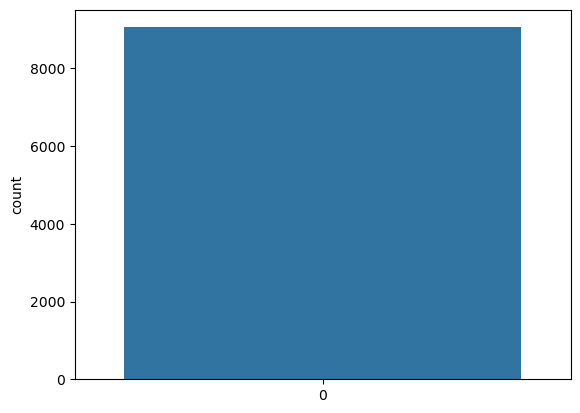

In [67]:
sns.countplot(parking['Total Parking Spaces'])